In [1]:
!pip install opencv-python



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import copy
# from skimage.color import rgb2gray

In [3]:
messi = 'static\images\messi.jpg'
flowers = 'static\images\magnitude image.jpg'

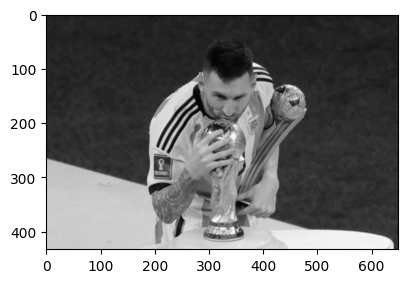

In [4]:
messi = cv2.imread(messi, 0)
flower = cv2.imread(flowers, 0)
# print(flower)
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi, cmap='gray')






In [5]:
def get_size_of_images(img):
  
    # get width and height
    if img is None:
        return -1,-1
    else:

        width = img.shape[1]
        height = img.shape[0]
        print ("the width is" , width)
        print ("the height is" , height)
        return width , height


In [6]:
def dimension_to_transform(img_1,img_2):
    width1 , height1  = get_size_of_images(img_1)
    width2 , height2  = get_size_of_images(img_2)
    if(width1 ==-1 or height1 ==-1):
        return width2 ,height2
    elif (width2 ==-1 or height2 ==-1):
        return width1 ,height1
    else:
        if (width1 > width2):
            width = width2
        else:
            width = width1
        
        if (height1 > height2):
            height = height2
        else:
            height = height1

        return width , height

In [7]:
dimension_to_transform(messi,flower)

the width is 650
the height is 433
the width is 5631
the height is 3518


(650, 433)

In [8]:
def Resizing_image(img_1 , img_2):
    width , height = dimension_to_transform(img_1,img_2)
    print(width)
    print(height)
    if  img_2 is not None:
        img_1=cv2.resize(img_1 , (width,height))
        img_2=cv2.resize(img_2 , (width,height))
        return img_1 , img_2


    

In [9]:
messi_resized , flower_resized =Resizing_image(messi,flower)

the width is 650
the height is 433
the width is 5631
the height is 3518
650
433


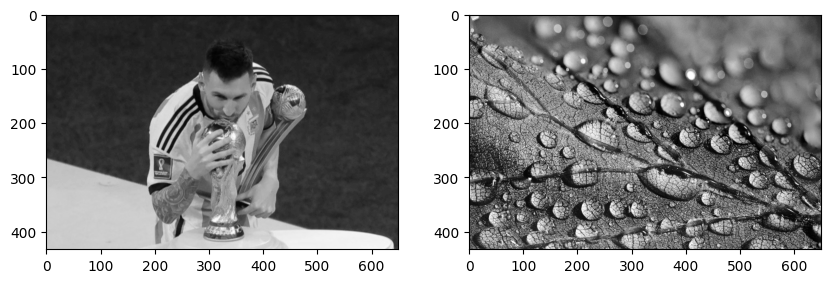

In [10]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi_resized, cmap='gray')
plt.subplot(122)
plt.imshow(flower_resized, cmap='gray')
plt.show()

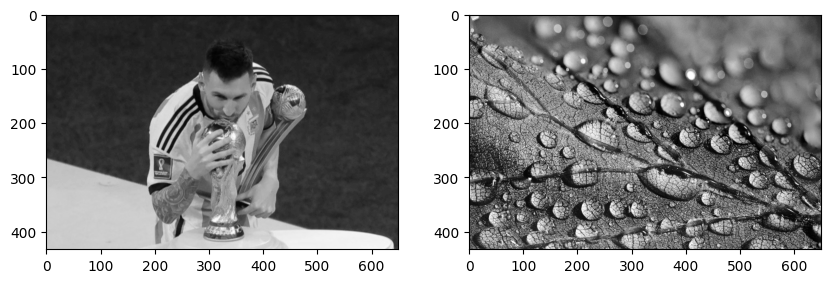

In [11]:

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi_resized, cmap='gray')
plt.subplot(122)
plt.imshow(flower_resized, cmap='gray')
plt.show()

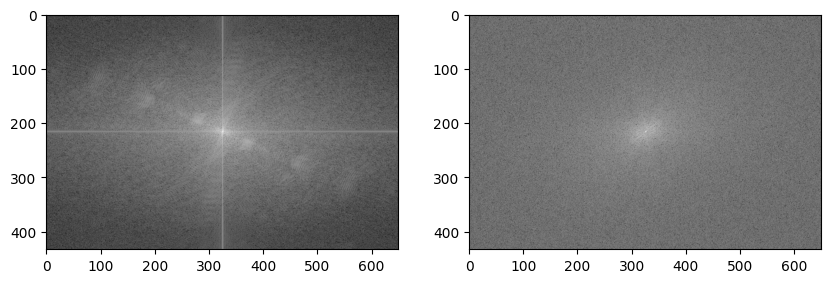

In [12]:
messi_fft = np.fft.fftshift(np.fft.fft2(messi_resized))
flower_fft = np.fft.fftshift(np.fft.fft2(flower_resized))

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(np.abs(messi_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(flower_fft)), cmap='gray')
plt.show()

In [13]:
messi_amplitude = np.sqrt(np.real(messi_fft) ** 2 + np.imag(messi_fft) ** 2)
messi_phase = np.arctan2(np.imag(messi_fft), np.real(messi_fft))
flower_amplitude = np.sqrt(np.real(flower_fft) ** 2 + np.imag(flower_fft) ** 2)
flower_phase = np.arctan2(np.imag(flower_fft), np.real(flower_fft))

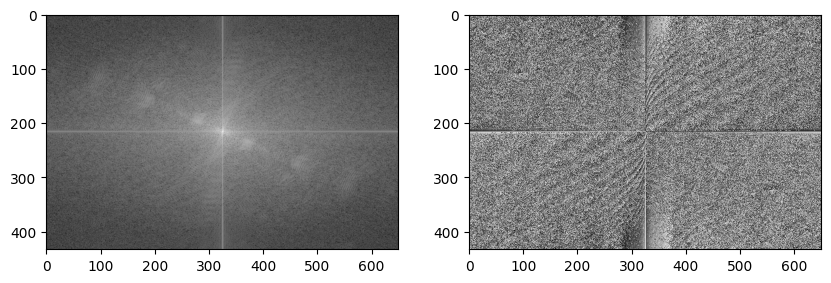

In [14]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(messi_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(messi_phase, cmap='gray')

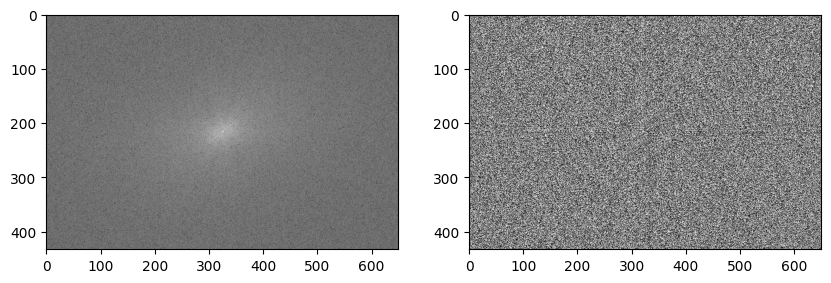

In [15]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(flower_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(flower_phase, cmap='gray')

In [16]:
messi_amplitude_copy = messi_amplitude.copy()
messi_amplitude_copy1 = messi_amplitude.copy()

In [17]:
print ((messi_amplitude_copy == messi_amplitude_copy1).all())


True


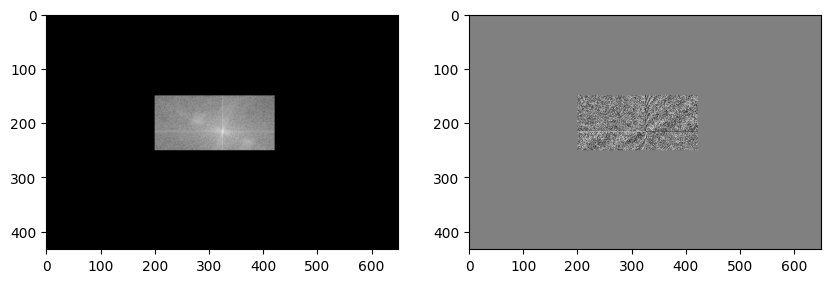

In [18]:
messi_amplitude_copy1 = messi_amplitude.copy()
messi_phase_copy1 = messi_phase.copy()

for x in range (0, messi_amplitude.shape[0]):
    for y in range ( 0,messi_amplitude.shape[1]):
        if (not((x>=150 and x<=250) and(y >=200 and y <=420))):
                messi_amplitude_copy1[x][y] =    1        

# print (messi_amplitude_copy1[150:250 , 200:420])


for x in range (0, messi_phase.shape[0]):
    for y in range ( 0,messi_phase.shape[1]):
        if (not((x>=150 and x<=250) and(y >=200 and y <=420))):
                messi_phase_copy1[x][y] =   0
        
      
        
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(messi_amplitude_copy1+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(messi_phase_copy1, cmap='gray')


-----------------------------------------------------------------------------------------------------------------------------------------------


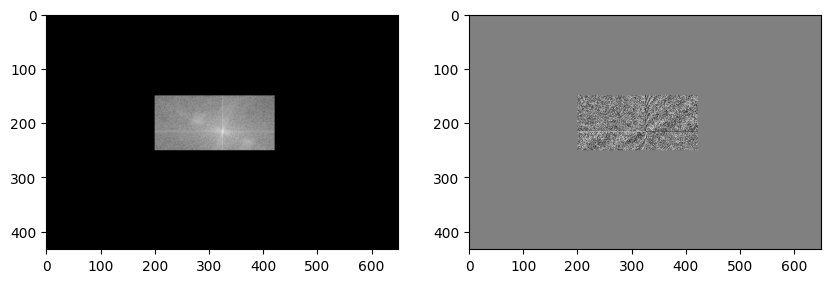

In [19]:
messi_amplitude_copy = messi_amplitude.copy()
messi_phase_copy = messi_phase.copy()
mask_array = np.ones(messi_amplitude_copy.shape)
x = mask_array==1

mask_array[150:251,200:421] = mask_array[150:251,200:421] * ~x[150:251 , 200:421] + messi_amplitude_copy[150:251 , 200:421]
messi_amplitude_copy = mask_array

# print (messi_amplitude_copy[150:251 , 200:420])


print("-----------------------------------------------------------------------------------------------------------------------------------------------")

mask_array = np.zeros(messi_phase_copy.shape)
x = mask_array==0

mask_array[150:251,200:421] = mask_array[150:251,200:421] * ~x[150:251 , 200:421] + messi_phase_copy[150:251 , 200:421]
messi_phase_copy = mask_array

# print (messi_phase_copy[150:251 , 200:420])


plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(messi_amplitude_copy+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(messi_phase_copy, cmap='gray')



In [20]:
print ((messi_phase_copy == messi_phase_copy1).all())
print (np.array_equal(messi_phase_copy.flatten() , messi_phase_copy1.flatten()))
difference = set(messi_phase_copy.flatten() ) - set(messi_phase_copy1.flatten() )
print(difference)
print(len(difference))

True
True
set()
0


In [21]:
flag = True
row1 = len(messi_phase_copy);  
col1 = len(messi_phase_copy[0]);  
   
#Calculates number of rows and columns present in second matrix  
row2 = len(messi_phase_copy1);  
col2 = len(messi_phase_copy1[0]);  
   
#Checks if dimensions of both the matrices are equal  
if(row1 != row2 or col1 != col2):  
    print("Matrices are not equal");  
   
else:  
    for i in range(0, row1):  
        for j in range(0, col1):  
            if(messi_phase_copy[i][j] != messi_phase_copy1[i][j]):  
                flag = False;  
                break;  
      
    if(flag):  
        print("Matrices are equal");  
    else:  
        print("Matrices are not equal");  

Matrices are equal


-----------------------------------------------------------------------------------------------------------------------------------------------


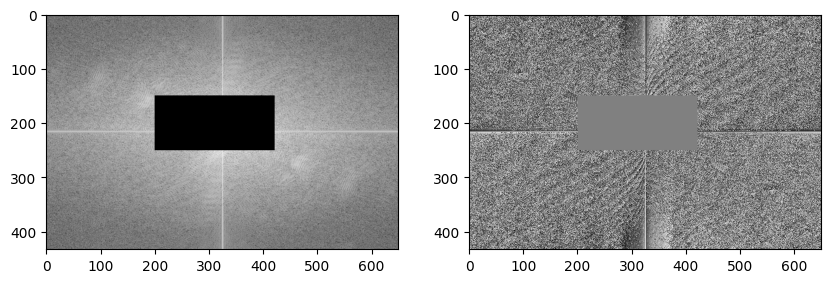

In [22]:
messi_amplitude_copy = messi_amplitude.copy()
messi_phase_copy = messi_phase.copy()
mask_array = np.ones(messi_amplitude_copy.shape)
x = mask_array==1

messi_amplitude_copy[150:251,200:421] = messi_amplitude_copy[150:251,200:421] * ~x[150:251 , 200:421] + mask_array[150:251 , 200:421]

# print (messi_amplitude_copy[150:251 , 200:420])


print("-----------------------------------------------------------------------------------------------------------------------------------------------")

mask_array = np.zeros(messi_phase_copy.shape)
x = mask_array==0

messi_phase_copy[150:251,200:421] = messi_phase_copy[150:251,200:421] * ~x[150:251 , 200:421] + mask_array[150:251 , 200:421]

# print (messi_phase_copy[150:251 , 200:420])


plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(messi_amplitude_copy+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(messi_phase_copy, cmap='gray')



In [23]:
def diff_2d_array(arr1, arr2):
    result = []
    for row1 in arr1:
        for row2 in arr2:
            if row1 != row2:
                result.append(row1)

    return result

In [24]:
# print ((messi_phase_copy == messi_phase_copy1).all())
# print (np.array_equal(messi_phase_copy.flatten() , messi_phase_copy1.flatten()))
difference = set(messi_phase_copy.flatten() ) - set(messi_phase_copy1.flatten() )
# print(difference)
# print(len(difference))


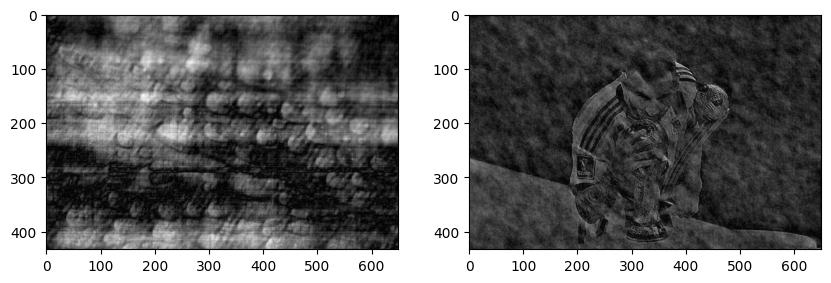

In [25]:
# amplitude_phase
messi_flower_comb = np.multiply(messi_amplitude, np.exp(1j * flower_phase))
messi_flower = np.abs(np.fft.ifft2(np.fft.ifftshift(messi_flower_comb)))  # drop imagniary as they are around 1e-14

flower_messi_comb = np.multiply(flower_amplitude, np.exp(1j * messi_phase))
flower_messi = np.abs(np.fft.ifft2(np.fft.ifftshift(flower_messi_comb )))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.abs(messi_flower), cmap='gray')
plt.subplot(122)
plt.imshow(np.abs(flower_messi), cmap='gray')



In [26]:
print (messi_amplitude)
print(messi_amplitude.shape)
x, y = messi_amplitude.shape
print(x)
print(y)


[[233.14662918 112.92085948 288.79121873 ... 175.02731939 222.30000027
   39.5992063 ]
 [218.12865602 171.66700588 198.22264782 ... 212.89351723  67.99755746
  390.83432352]
 [252.72842087 355.4016491  113.88891288 ... 133.12137679 189.61911907
  336.39338109]
 ...
 [252.72842087 336.39338109 189.61911907 ... 252.23731221 113.88891288
  355.4016491 ]
 [218.12865602 390.83432352  67.99755746 ... 174.64069182 198.22264782
  171.66700588]
 [233.14662918  39.5992063  222.30000027 ... 367.69365567 288.79121873
  112.92085948]]
(433, 650)
433
650


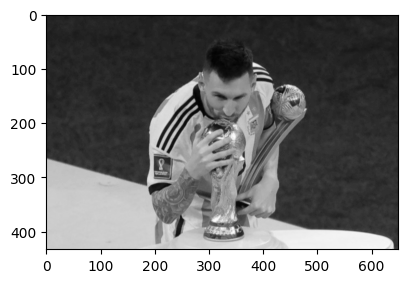

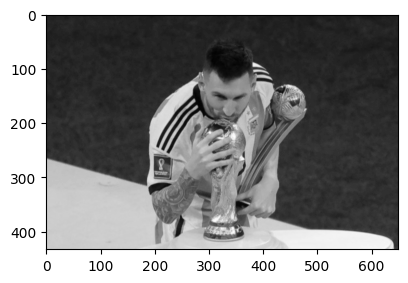

In [27]:
messi_flower_comb = np.multiply(messi_amplitude, np.exp(1j * messi_phase))
messi_flower = np.real(np.fft.ifft2(np.fft.ifftshift(messi_flower_comb)))  # drop imagniary as they are around 1e-14



# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi_flower, cmap='gray')


plt.figure(figsize=(10, 15))
plt.subplot(122)
plt.imshow(messi, cmap='gray')


In [28]:

for x in range (0, messi_phase.shape[0]):
    for y in range ( 0,messi_phase.shape[1]):
                flower_amplitude[x][y] =   1


for x in range (0, messi_phase.shape[0]):
    for y in range ( 0,messi_phase.shape[1]):
                flower_phase[x][y] = 0


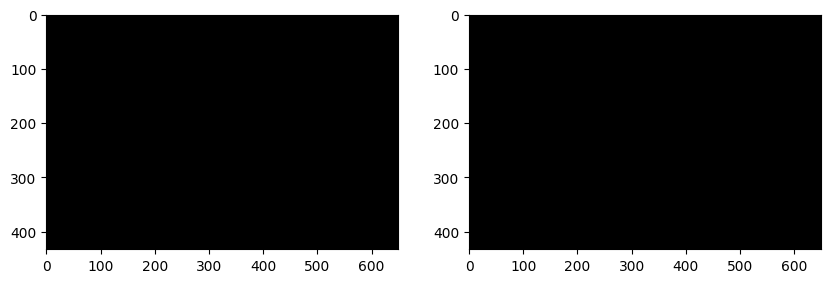

In [29]:


plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(np.abs(flower_amplitude)), cmap='gray')
plt.subplot(122)
plt.imshow((np.abs(flower_phase)), cmap='gray')
plt.show()


In [30]:
print(flower_amplitude)
print('--------------------------------------')
print(flower_phase)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
--------------------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


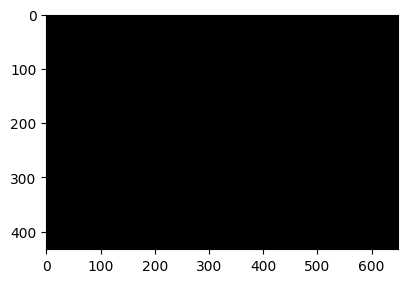

In [31]:
uniform_image = np.multiply(flower_amplitude, np.exp(1j * flower_phase))
uniform_image = np.abs(np.fft.ifft2(np.fft.ifftshift(uniform_image )))

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(uniform_image ,cmap='gray')



True

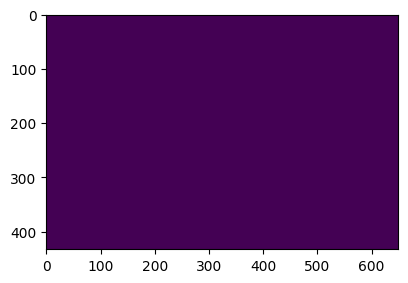

In [32]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(uniform_image)

cv2.imwrite('image_rgb.png', uniform_image)

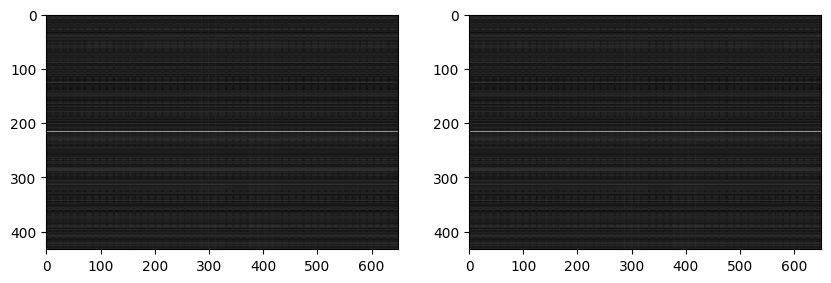

In [33]:
uniform_fft = np.fft.fftshift(np.fft.fft2(uniform_image))

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(np.abs(uniform_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(uniform_fft)), cmap='gray')
plt.show()

C:\Users\هانيااحمدسامىعبدالعظ\AppData\Local\Temp\ipykernel_22444\3612156332.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(uniform_phase)), cmap='gray')


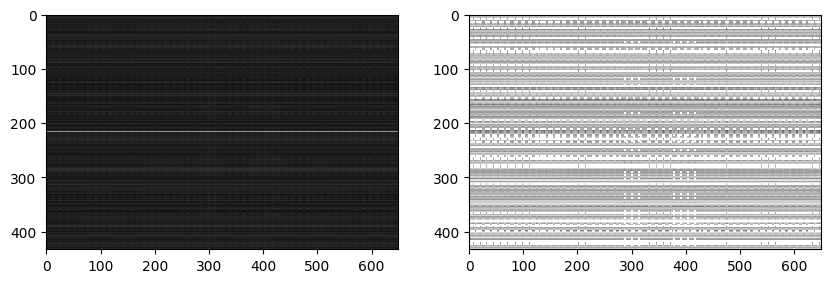

In [34]:
uniform_amplitude = np.sqrt(np.real(uniform_fft) ** 2 + np.imag(uniform_fft) ** 2)
uniform_phase = np.arctan2(np.imag(uniform_fft), np.real(uniform_fft))

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(np.abs(uniform_amplitude)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(uniform_phase)), cmap='gray')
plt.show()


In [35]:
print(uniform_amplitude)
print('--------------------------------------------------------')
print(uniform_phase)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
--------------------------------------------------------
[[-2.77555756e-16 -2.77555756e-16 -2.77555756e-16 ... -2.77555756e-16
  -2.77555756e-16 -2.77555756e-16]
 [ 1.66533454e-16  1.66533454e-16  2.22044605e-16 ...  1.66533454e-16
   1.66533454e-16  1.66533454e-16]
 [-2.77555756e-16 -2.77555756e-16 -1.66533454e-16 ... -2.77555756e-16
  -2.77555756e-16 -2.77555756e-16]
 ...
 [-1.11022302e-16 -1.11022302e-16  1.66533454e-16 ... -1.11022302e-16
  -1.11022302e-16 -1.11022302e-16]
 [-3.88578059e-16 -3.88578059e-16 -3.33066907e-16 ... -3.88578059e-16
  -3.88578059e-16 -3.88578059e-16]
 [-4.44089210e-16 -4.44089210e-16 -3.88578059e-16 ... -4.44089210e-16
  -4.44089210e-16 -4.44089210e-16]]
